In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [4]:
df_min=df[df['10']==1]

In [5]:
df_min.to_csv('page-blocks0_minority_train.csv',index=False)
df_min=pd.read_csv('page-blocks0_minority_train.csv')

In [6]:
df_majority=df[df['10']==0]
df_majority.to_csv('page-blocks0_majority_train.csv',index=False)
df_majority=pd.read_csv('page-blocks0_majority_train.csv')

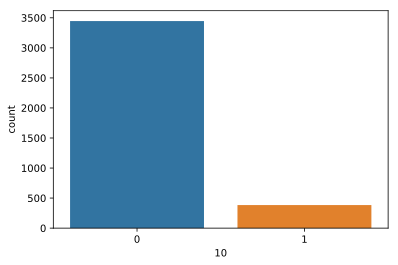

In [7]:
%matplotlib inline
sns.countplot(x='10',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(378, 5, 11)
(378, 11)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(11))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                231       
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
226/226 [==============================] - 3s 13ms/step - loss: 0.1390
Epoch 2/1000
226/226 [==============================] - 0s 688us/step - loss: 0.1161
Epoch 3/1000
226/226 [==============================] - 0s 577us/step - loss: 0.0975
Epoch 4/1000
226/226 [==============================] - 0s 723us/step - loss: 0.0816
Epoch 5/1000
226/226 [==============================] - 0s 947us/step - loss: 0.0685
Epoch 6/1000
226/226 [==============================] - 0s 914us/step - loss: 0.0575
Epoch 7/1000
226/226 [==============================] - 0s 821us/step - loss: 0.0492
Epoch 8/1000
226/226 [==============================] - 0s 708us/step - loss: 0.0433
Epoch 9/1000
226/226 [==============================] - 0s 911us/step - loss: 0.0404
Epoch 10/1000
226/226 [==============================] - 0s 830us/step - loss: 0.0387
Epoch 11/1000
226/226 [==============================] - 0s 976us/step - loss: 0.0384
Epoch 12/1000
226/226 [==============================] - 0s 941u

226/226 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 99/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 100/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 101/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 102/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 103/1000
226/226 [==============================] - 0s 983us/step - loss: 0.0356
Epoch 104/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 105/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 106/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 107/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 108/1000
226/226 [==============================] - 0s 998us/step - loss: 0.0354
Epoch 109/1000
226/226 [==============================] - 0s 1ms/step - loss:

226/226 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 194/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 195/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0350
Epoch 196/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 197/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 198/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 199/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 200/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 201/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 202/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 203/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 204/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.

226/226 [==============================] - 0s 736us/step - loss: 0.0340
Epoch 289/1000
226/226 [==============================] - 0s 719us/step - loss: 0.0338
Epoch 290/1000
226/226 [==============================] - 0s 710us/step - loss: 0.0340
Epoch 291/1000
226/226 [==============================] - 0s 703us/step - loss: 0.0339
Epoch 292/1000
226/226 [==============================] - 0s 772us/step - loss: 0.0339
Epoch 293/1000
226/226 [==============================] - 0s 703us/step - loss: 0.0339
Epoch 294/1000
226/226 [==============================] - 0s 825us/step - loss: 0.0340
Epoch 295/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 296/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 297/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 298/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 299/1000
226/226 [==============================] - 0s 1ms/s

226/226 [==============================] - 0s 701us/step - loss: 0.0332
Epoch 383/1000
226/226 [==============================] - 0s 821us/step - loss: 0.0334
Epoch 384/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 385/1000
226/226 [==============================] - 0s 866us/step - loss: 0.0332
Epoch 386/1000
226/226 [==============================] - 0s 847us/step - loss: 0.0333
Epoch 387/1000
226/226 [==============================] - 0s 921us/step - loss: 0.0331
Epoch 388/1000
226/226 [==============================] - 0s 701us/step - loss: 0.0330
Epoch 389/1000
226/226 [==============================] - 0s 674us/step - loss: 0.0331
Epoch 390/1000
226/226 [==============================] - 0s 617us/step - loss: 0.0330
Epoch 391/1000
226/226 [==============================] - 0s 630us/step - loss: 0.0330
Epoch 392/1000
226/226 [==============================] - 0s 621us/step - loss: 0.0330
Epoch 393/1000
226/226 [==============================] - 0s

226/226 [==============================] - 0s 692us/step - loss: 0.0319
Epoch 477/1000
226/226 [==============================] - 0s 643us/step - loss: 0.0325
Epoch 478/1000
226/226 [==============================] - 0s 639us/step - loss: 0.0326
Epoch 479/1000
226/226 [==============================] - 0s 634us/step - loss: 0.0326
Epoch 480/1000
226/226 [==============================] - 0s 674us/step - loss: 0.0322
Epoch 481/1000
226/226 [==============================] - 0s 644us/step - loss: 0.0320
Epoch 482/1000
226/226 [==============================] - 0s 612us/step - loss: 0.0319
Epoch 483/1000
226/226 [==============================] - 0s 626us/step - loss: 0.0322
Epoch 484/1000
226/226 [==============================] - 0s 621us/step - loss: 0.0323
Epoch 485/1000
226/226 [==============================] - 0s 648us/step - loss: 0.0320
Epoch 486/1000
226/226 [==============================] - 0s 697us/step - loss: 0.0331
Epoch 487/1000
226/226 [==============================] - 

226/226 [==============================] - 0s 688us/step - loss: 0.0311
Epoch 571/1000
226/226 [==============================] - 0s 643us/step - loss: 0.0313
Epoch 572/1000
226/226 [==============================] - 0s 692us/step - loss: 0.0311
Epoch 573/1000
226/226 [==============================] - 0s 648us/step - loss: 0.0310
Epoch 574/1000
226/226 [==============================] - 0s 603us/step - loss: 0.0310
Epoch 575/1000
226/226 [==============================] - 0s 630us/step - loss: 0.0311
Epoch 576/1000
226/226 [==============================] - 0s 590us/step - loss: 0.0309
Epoch 577/1000
226/226 [==============================] - 0s 617us/step - loss: 0.0308
Epoch 578/1000
226/226 [==============================] - 0s 594us/step - loss: 0.0309
Epoch 579/1000
226/226 [==============================] - 0s 665us/step - loss: 0.0308
Epoch 580/1000
226/226 [==============================] - 0s 594us/step - loss: 0.0309
Epoch 581/1000
226/226 [==============================] - 

226/226 [==============================] - 0s 714us/step - loss: 0.0300
Epoch 665/1000
226/226 [==============================] - 0s 661us/step - loss: 0.0307
Epoch 666/1000
226/226 [==============================] - 0s 630us/step - loss: 0.0308
Epoch 667/1000
226/226 [==============================] - 0s 692us/step - loss: 0.0302
Epoch 668/1000
226/226 [==============================] - 0s 626us/step - loss: 0.0302
Epoch 669/1000
226/226 [==============================] - 0s 599us/step - loss: 0.0302
Epoch 670/1000
226/226 [==============================] - 0s 639us/step - loss: 0.0299
Epoch 671/1000
226/226 [==============================] - 0s 629us/step - loss: 0.0303
Epoch 672/1000
226/226 [==============================] - 0s 619us/step - loss: 0.0299
Epoch 673/1000
226/226 [==============================] - 0s 648us/step - loss: 0.0308
Epoch 674/1000
226/226 [==============================] - 0s 679us/step - loss: 0.0305
Epoch 675/1000
226/226 [==============================] - 

226/226 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 759/1000
226/226 [==============================] - 0s 852us/step - loss: 0.0290
Epoch 760/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0290
Epoch 761/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 762/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 763/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 764/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 765/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 766/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 767/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 768/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 769/1000
226/226 [==============================] - 0s 1ms/step - loss: 

226/226 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 855/1000
226/226 [==============================] - 0s 983us/step - loss: 0.0281
Epoch 856/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 857/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 858/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 859/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 860/1000
226/226 [==============================] - 0s 992us/step - loss: 0.0280
Epoch 861/1000
226/226 [==============================] - 0s 994us/step - loss: 0.0283
Epoch 862/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 863/1000
226/226 [==============================] - 0s 989us/step - loss: 0.0281
Epoch 864/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 865/1000
226/226 [==============================] - 0s 1ms/step - 

226/226 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 951/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 952/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 953/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 954/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 955/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 956/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 957/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 958/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 959/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 960/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 961/1000
226/226 [==============================] - 0s 1ms/step - loss: 0.

In [14]:
model.save('page-blocks0.h5')

In [15]:
Xtrain.shape

(226, 5, 11)

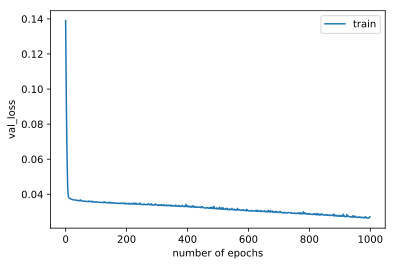

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

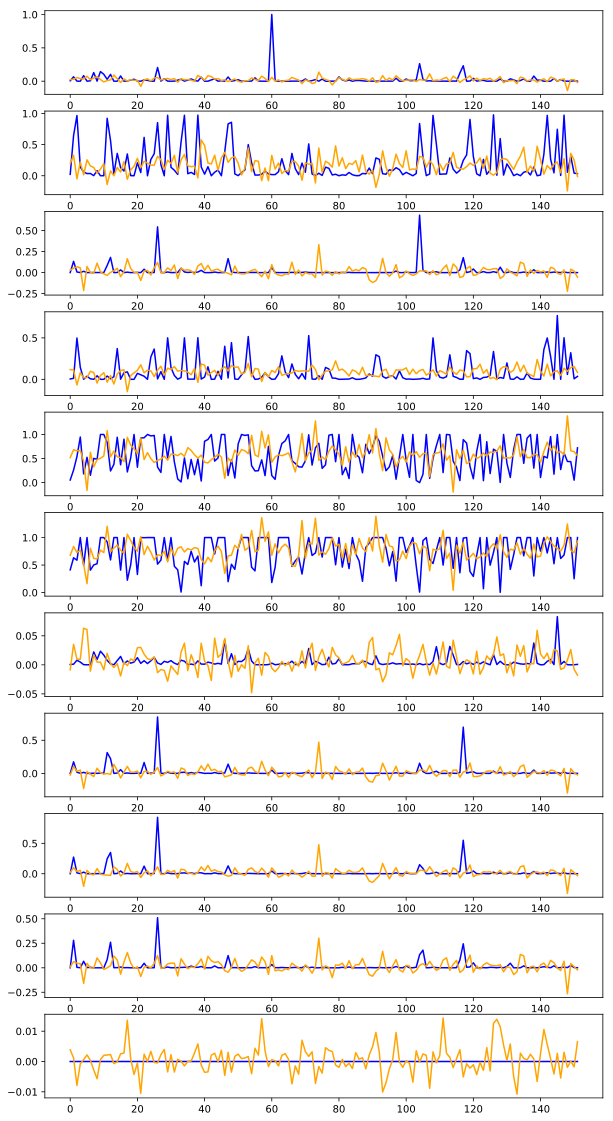

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.2560477e-02,  1.9455761e-01,  2.9208913e-02, ...,
         1.9611273e-02,  8.0192238e-03,  3.8722511e-03],
       [ 2.9322132e-02,  3.2904738e-01,  5.3264353e-02, ...,
         9.9498704e-02,  6.2843725e-02,  1.1652522e-03],
       [ 5.4182440e-02, -5.0625727e-02,  6.9715463e-02, ...,
         3.7244696e-02,  4.7038302e-02, -7.8866147e-03],
       ...,
       [ 2.4148151e-02,  3.6046845e-01,  4.0590666e-02, ...,
         6.7267038e-02,  4.2416409e-02,  1.2000278e-04],
       [ 2.1645695e-02,  2.5279969e-01,  1.7533720e-02, ...,
         1.8715477e-02,  1.0837436e-02, -1.7541461e-03],
       [-1.9004501e-02, -1.2965374e-02, -5.4674976e-02, ...,
        -3.0327693e-02, -2.1311946e-02,  6.5563377e-03]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

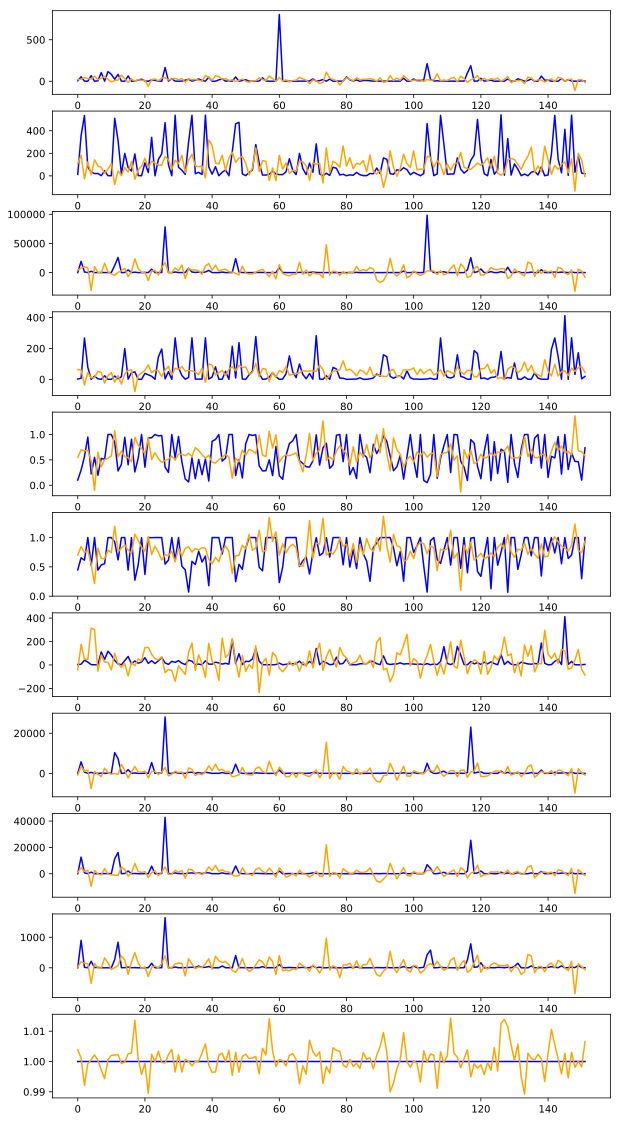

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.2560477e-02,  1.9455761e-01,  2.9208913e-02, ...,
         1.9611273e-02,  8.0192238e-03,  3.8722511e-03],
       [ 2.9322132e-02,  3.2904738e-01,  5.3264353e-02, ...,
         9.9498704e-02,  6.2843725e-02,  1.1652522e-03],
       [ 5.4182440e-02, -5.0625727e-02,  6.9715463e-02, ...,
         3.7244696e-02,  4.7038302e-02, -7.8866147e-03],
       ...,
       [ 2.4148151e-02,  3.6046845e-01,  4.0590666e-02, ...,
         6.7267038e-02,  4.2416409e-02,  1.2000278e-04],
       [ 2.1645695e-02,  2.5279969e-01,  1.7533720e-02, ...,
         1.8715477e-02,  1.0837436e-02, -1.7541461e-03],
       [-1.9004501e-02, -1.2965374e-02, -5.4674976e-02, ...,
        -3.0327693e-02, -2.1311946e-02,  6.5563377e-03]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)